In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 10
# 载入图片

# plt.imshow(image,'gray')
# plt.show()



# 通过直线来检测

angle --> 41.03690919731683 lines -- > 16 handle time 0.022990942001342773


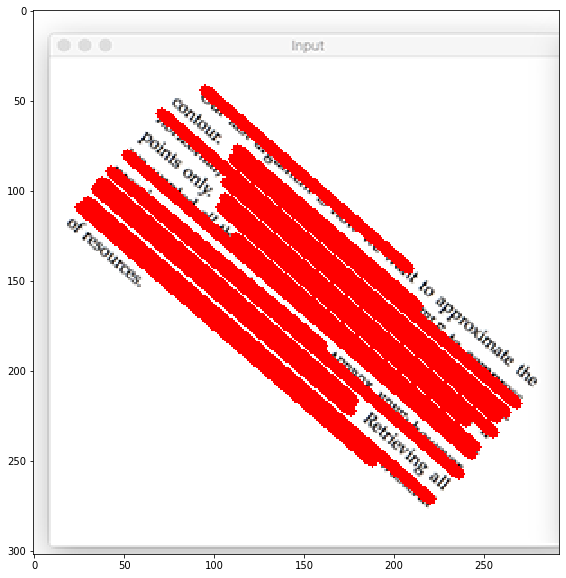

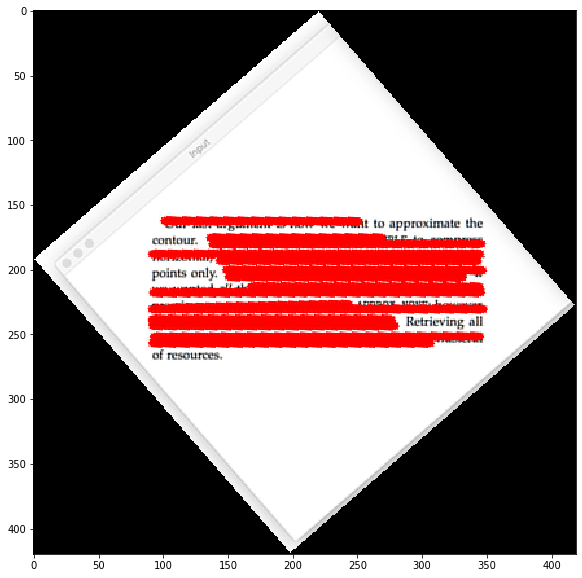

In [296]:
import math
from scipy import ndimage 
import time

begin_time = time.time()
# 边缘检测 
# img_path = 'D:\\img\\exam\\3.jpg'
img_path = 'D:\\img\\exam\\word.png'
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny算法对输入图像进行边缘检测  
# https://blog.csdn.net/u012198575/article/details/84565062   “边缘“识别
# https://blog.csdn.net/qq_31239495/article/details/90404740
# https://blog.csdn.net/bbbeoy/article/details/86665207
# https://blog.csdn.net/qq_18343569/article/details/47174641
img_edges = cv2.Canny(img_gray, 100, 300, apertureSize=3)

# HoughLinesP函数是统计概率霍夫线变换函数，该函数能输出检测到的直线的端点 (x_{0}, y_{0}, x_{1}, y_{1})
# HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) 
# rho参数表示参数极径  以像素值为单位的分辨率，这里一般使用 1 像素。
# theta参数表示参数极角  以弧度为单位的分辨率，这里使用 1度。
# threshold参数表示检测一条直线所需最少的曲线交点。
# minLineLength参数表示能组成一条直线的最少点的数量，点数量不足的直线将被抛弃。
# maxLineGap参数表示能被认为在一条直线上的亮点的最大距离
# https://blog.csdn.net/weixin_30627341/article/details/95614934
# https://blog.csdn.net/qq_39861376/article/details/82119472 霍夫变换 检测直线，圆形
# http://www.360doc.com/content/18/0622/22/47813312_764524091.shtml 极坐标
# https://blog.csdn.net/qq_37059483/article/details/77891698

lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)
angles = []

for x1, y1, x2, y2 in [x[0] for x in lines]:
    cv2.line(image, (x1, y1), (x2, y2), (255,0,0), 5)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)
median_angle = np.median(angles)
print('angle --> {} lines -- > {} handle time {}'.format(median_angle, len(lines), (time.time()-begin_time)))
plt.imshow(image,'brg')
plt.show()
img_rotated = ndimage.rotate(image, median_angle)
plt.imshow(img_rotated, 'brg')
plt.show()

In [11]:
print(lines[0:5])

[[[ 579 1311  819 1311]]

 [[ 378  809  531  809]]

 [[1835 2773 1941 2774]]

 [[1654 2824 1804 2826]]

 [[ 790  861  907  861]]]


# 通过特定物体来检测

## 通过模板方式查找特定物质来检测

In [156]:
# 生成检测图片
img = np.zeros((32, 32, 3), np.uint8)
img.fill(255)
print(img.shape)
point_size = 1
point_color = (0, 0, 0) # BGR
thickness = 4 # 可以为 0 、4、8
cv2.circle(img, (16, 16), 2, point_color, 2)
cv2.circle(img, (16, 16), 8, point_color, 4)
cv2.circle(img, (16, 16), 14, point_color, 4)
plt.imsave('D:\\img\\exam\\detect.png',img)
# plt.imshow(img, 'brg')
# plt.show()
def gen_cicle_log(image, x_position, y_position, scale=1):
    point_size = 1
    point_color = (0, 0, 0) # BGR
    thickness = 0 # 可以为 0 、4、8
    cv2.circle(image, (16 + x_position, 16 + y_position), int(2 * scale), point_color, 2)
    cv2.circle(image, (16 + x_position, 16 + y_position), int(8 * scale), point_color, 4)
    cv2.circle(image, (16 + x_position, 16 + y_position), int(14 * scale), point_color, 4)
    

(32, 32, 3)


In [157]:
# https://www.cnblogs.com/yuanchenhui/p/opencv_qr.html
# http://aishack.in/tutorials/scanning-qr-codes-1/
# https://blog.csdn.net/ktigerhero3/article/details/53071364
# import cv2 as cv

img_path = 'D:\\img\\exam\\1.jpg'
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
gen_cicle_log(image, 200, 200, 2)
gen_cicle_log(image, 800, 200, 2)
gen_cicle_log(image, 380, 200, 2)
cv2.imwrite('d:\\img\\exam\\1_n.jpg', image)
# # plt.imsave('d:\\img\\exam\\1_n.jpg', image)

img_path = 'D:\\img\\exam\\1_n.jpg'
image = cv2.imread(img_path, cv2.IMREAD_COLOR)
image = cv2.resize(image, (0, 0), fx=0.5,fy=0.5, interpolation=cv2.INTER_LINEAR)
cv2.imwrite('d:\\img\\exam\\1_resize.jpg', image)
print(image.shape)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_bin = cv.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 25, 10)

template = cv2.imread('D:\\img\\exam\\detect.png',cv2.IMREAD_COLOR)
template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
ret, template_bin = cv2.threshold(template, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)

w, h = template.shape[::-1]
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
methods = ['cv2.TM_CCORR_NORMED']


for meth in methods:
    img = img_bin.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template_bin,method)
    print('res --> {}'.format(len(res)))
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 0, 5)
#     plt.subplot(121),plt.imshow(res,cmap = 'gray')
#     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
#     plt.subplot(122),plt.imshow(img,cmap = 'gray')
#     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
#     plt.suptitle(meth)
#     plt.show()



(1984, 1488, 3)
res --> 1953


In [158]:
print(np.max(res))
loc = np.where(res>0.7)
newimg = image.copy()
for pt in zip(*loc[::-1]):
    print(pt, w, h)
    cv.rectangle(newimg, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
# plt.imshow(newimg,'brg')
# plt.show()

0.72669804
(91, 91) 32 32
(92, 91) 32 32
(181, 91) 32 32
(182, 91) 32 32
(391, 91) 32 32
(392, 91) 32 32
(91, 92) 32 32
(92, 92) 32 32
(181, 92) 32 32
(182, 92) 32 32
(391, 92) 32 32
(392, 92) 32 32


## 通过轮廓方式检测

shape -->(500, 1000, 3)
handle time -->0.04297018051147461


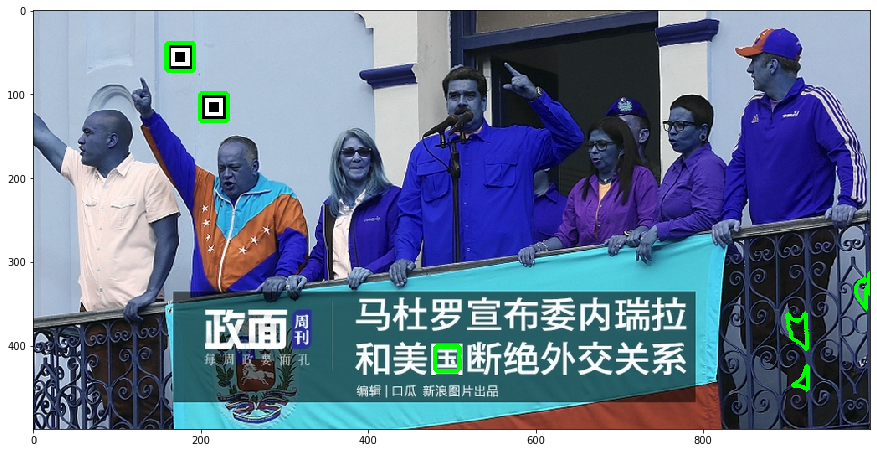

In [308]:
from math import *
import time
def gen_rect_log(image, x, y):
    start_x = x
    start_y = y
    end_x = x + 32
    end_y = y + 32
    image[y:y+32, x:x+32].fill(0)
    image[y+5:y+27, x+5:x+27].fill(255)
    image[y+10:y+22, x+10:x+22].fill(0)
    
def route_image(img,degree=-90):
    if degree == 0:
        return img
    height,width=img.shape[:2]
    heightNew=int(width*fabs(sin(radians(degree)))+height*fabs(cos(radians(degree))))
    widthNew=int(height*fabs(sin(radians(degree)))+width*fabs(cos(radians(degree))))
    matRotation=cv2.getRotationMatrix2D((width/2,height/2),degree,1)
    matRotation[0,2] +=(widthNew-width)/2  #重点在这步，目前不懂为什么加这步
    matRotation[1,2] +=(heightNew-height)/2  #重点在这步
    imgRotation=cv2.warpAffine(img,matRotation,(widthNew,heightNew),borderValue=(255,255,255))    
    return imgRotation

# 检测是否是需识别的标记
def check_qr_code(hierarchy, idx, contours=None) -> bool:
    
    is_qr_code = False
    num_child = 0
    current_child = hierarchy[0][idx][2]
    while current_child != -1:
#         print('current child -->', current_child)
        num_child = num_child + 1
        current_child = hierarchy[0][current_child][2]
        if num_child > 2:
            return False
#     print('num child  -->', num_child)
    if num_child == 2:
        is_qr_code = True
        
    return is_qr_code

img_path = 'D:\\img\\exam\\4.jpg'
image = cv2.imread(img_path, cv2.IMREAD_COLOR)

print('shape -->{}'.format(image.shape))
# image = np.zeros((256,256,3),np.uint8)
# image.fill(255)
gen_rect_log(image, 200, 100)
gen_rect_log(image, 160, 40)
# gen_rect_log(image, 160, 200)

image = route_image(image,degree=0)
begin_time = time.time()
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_bin = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 25, 10)
# hierarchy [Next, Previous, First_Child, Parent]
contours, hierarchy = cv2.findContours(image_bin, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# print(hierarchy)
qr_contors = []
for idx,item in enumerate(contours):
    x,y,w,h = cv.boundingRect(item)
#     print('check begin ------------------->', idx)
    check_result = check_qr_code(hierarchy, idx)
#     print('check end ------------------->', idx)
    if check_result:
        qr_contors.append(item)
#     if cv2.isContourConvex(item):
#     if hierarchy[0][idx][3] != -1:
#         cv.drawContours(image, [item], -1, (0,255,0), 1)
#         print('idx {}: first child --> {} x -->{} y --> {} w --> {} h -->{}'.format(idx, hierarchy[0][idx][2],x,y,w,h))
#     print(idx, '--->', hierarchy[idx])
#     print(idx, '--->', cv2.contourArea(item), cv2.isContourConvex(item), len(item), ' check result -->', check_result)
for idx, item in enumerate(qr_contors):
    x,y,w,h = cv.boundingRect(item)
#     print('idx --> {} {}:{}:{}:{}'.format(idx, x,y,w,h))
    cv.drawContours(image, [item], -1, (0,255,0), 4)
# print('qr code number -> {}'.format(len(qr_contors)))
print('handle time -->{}'.format(time.time() - begin_time))
cv2.imwrite('D:\\img\\exam\\result.jpg', image)
plt.imshow(image,'brg')
plt.show()

In [260]:
hierarchy[0][2]

array([-1, -1,  3,  1], dtype=int32)